In [ ]:
!pip install pmdarima -qq

     |████████████████████████████████| 1.4 MB 654 kB/s 
     |████████████████████████████████| 9.8 MB 21.6 MB/s 


In [ ]:
import datetime
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import product
from tqdm import tqdm_notebook
from tqdm import tqdm
import glob

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

from pylab import rcParams

from sklearn.metrics import mean_squared_error
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Apresentação dos dados

In [ ]:
recifemensal = pd.read_excel("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/BASENATALhorario.xlsx", index_col=0, parse_dates=[["Data", "HORA (UTC)"]])#.drop(columns=["Unnamed: 0"])

In [ ]:
recifemensal

,Precipitacao,Temperatura,Velocidade,Pressao
Data_HORA (UTC),,,,
2004-09-01 00:00:00,0.0,22.9,3.8,1010.5
2004-09-01 01:00:00,0.0,22.7,4.0,1009.8
2004-09-01 02:00:00,0.0,22.6,3.5,1009.5
2004-09-01 03:00:00,0.0,22.3,2.5,1009.1
2004-09-01 04:00:00,0.0,22.9,4.6,1009.6
...,...,...,...,...
2004-09-30 19:00:00,0.0,25.6,6.4,1007.3
2004-09-30 20:00:00,0.0,25.6,6.5,1007.7
2004-09-30 21:00:00,0.0,25.4,5.8,1008.2


In [ ]:
rcParams['figure.figsize'] = 30, 7

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


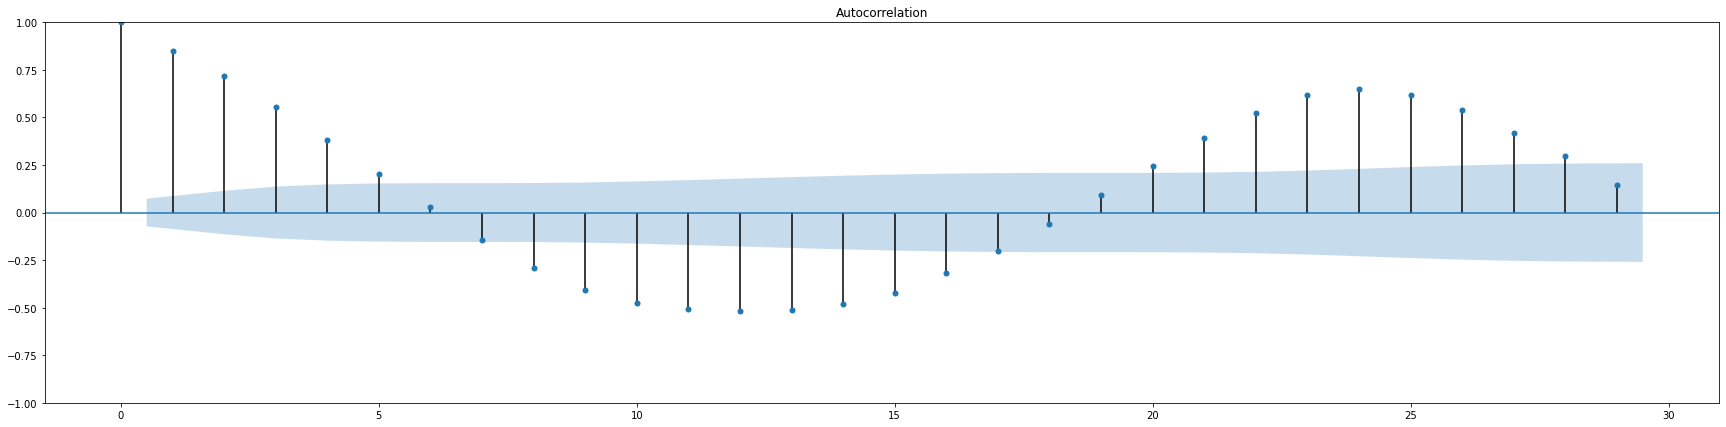

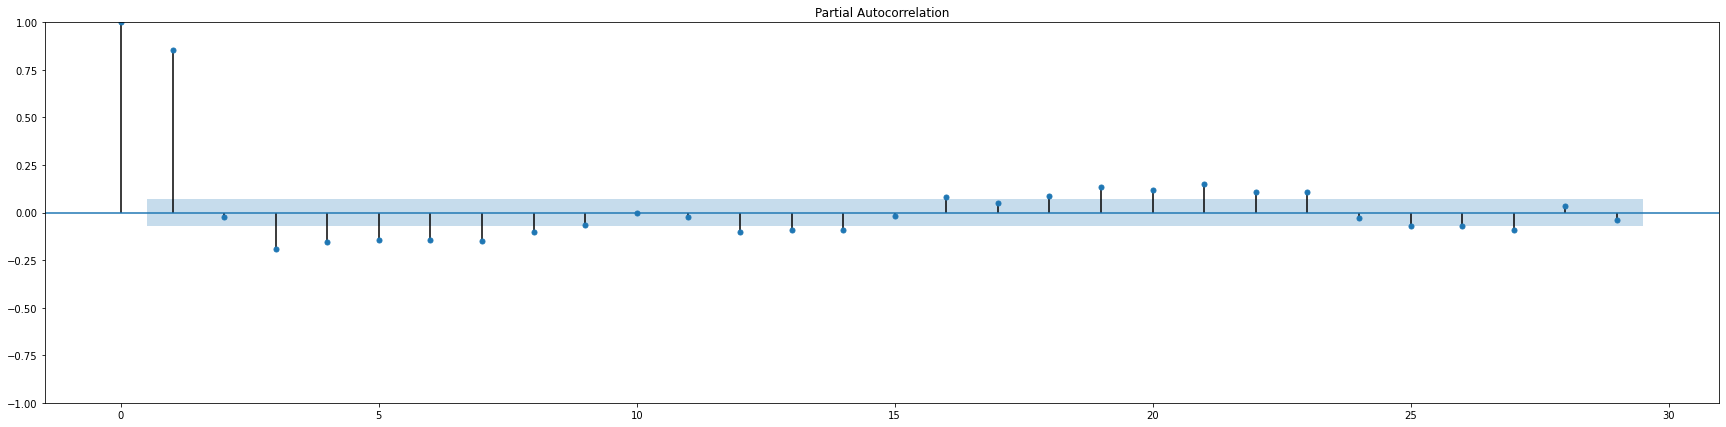

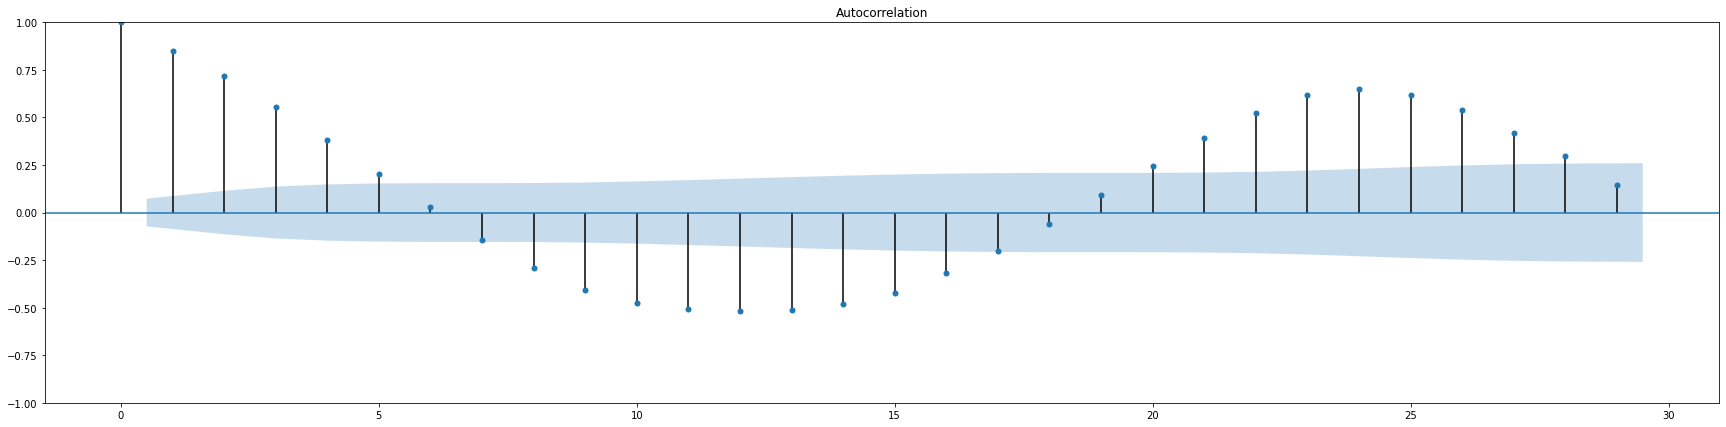

In [ ]:
plot_pacf(recifemensal["Velocidade"])
plot_acf(recifemensal["Velocidade"])

In [ ]:
quarto = int(recifemensal["Velocidade"].shape[0]/4)

In [ ]:
train = recifemensal["Velocidade"].iloc[:quarto*3].values.tolist()
test = recifemensal["Velocidade"].iloc[quarto*3:].values.tolist()

In [ ]:
model = pm.auto_arima(recifemensal["Velocidade"], m=24,D=1, trace=True,
                       error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[24] intercept   : AIC=inf, Time=41.93 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=2455.884, Time=0.18 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=1898.022, Time=4.65 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=5.99 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=2454.051, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=2090.823, Time=0.57 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=1838.956, Time=11.83 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=59.26 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=12.92 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=2275.985, Time=9.57 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=1812.671, Time=12.43 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=1875.123, Time=5.26 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=53.27 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=14.12 sec
 ARIMA(3,0,0)(2,1,0)[24] intercept   : AIC

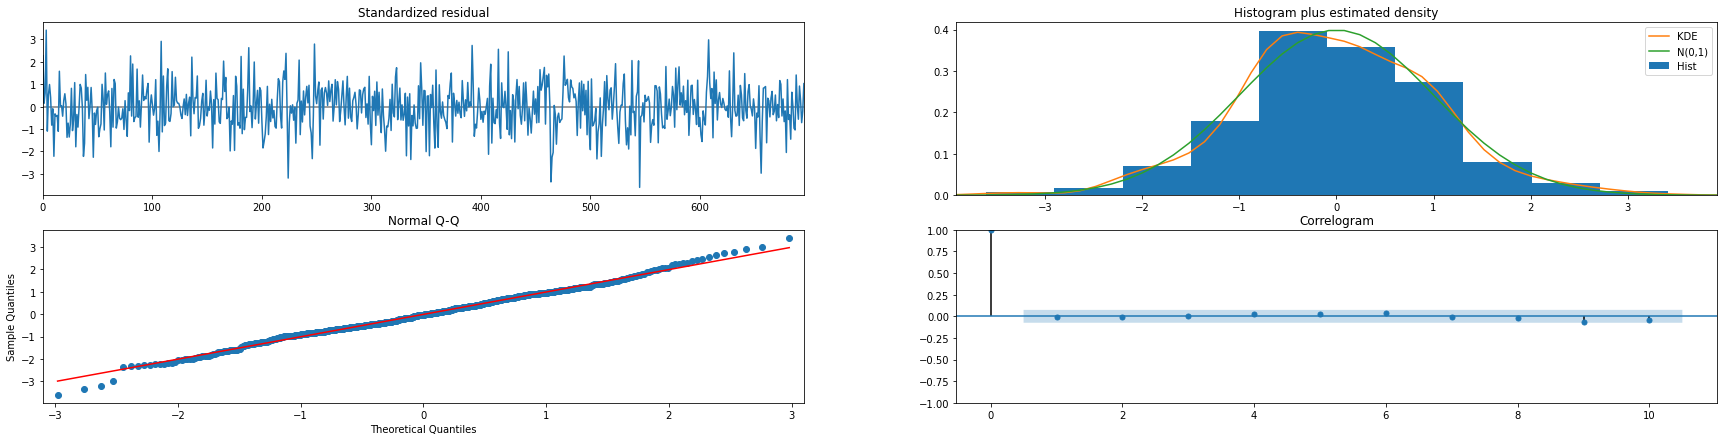

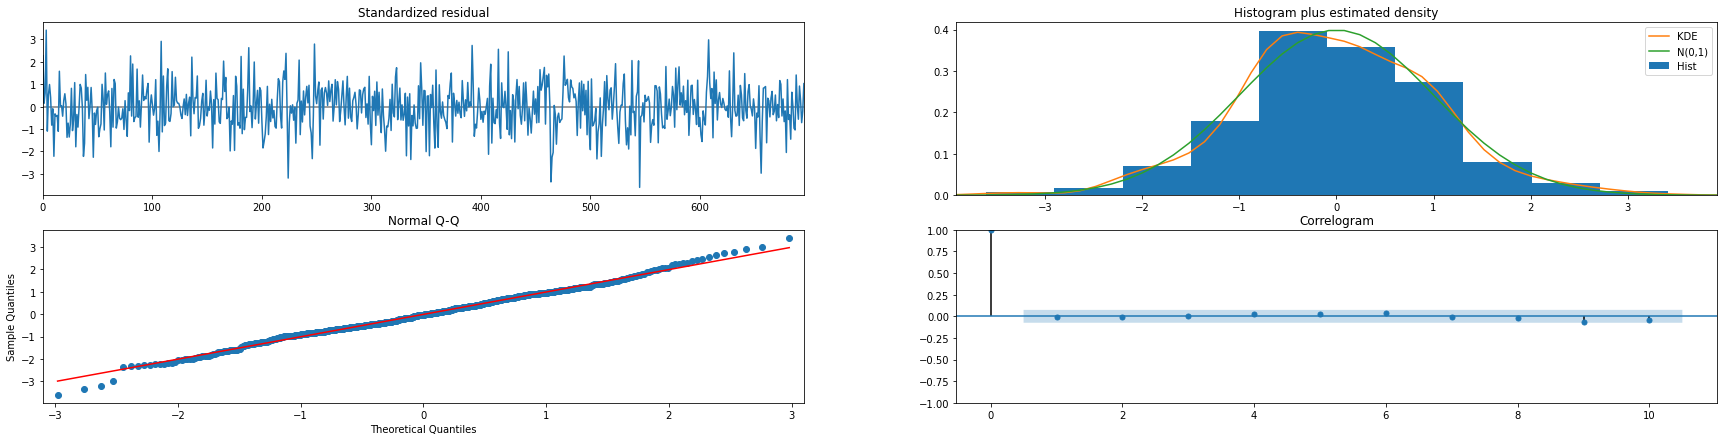

In [ ]:
model.plot_diagnostics()
#ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1836.592, Time=2.73 sec
#ARIMA(5,0,1)(2,1,1)[12] intercept   : AIC=1843.583, Time=37.67 sec
#ARIMA(3,0,0)(2,1,0)[24] intercept   : AIC=1812.349, Time=15.01 sec
#ARIMA(3,1,0)(2,1,0)[24]             : AIC=1858.038, Time=4.70 sec

In [ ]:
model.summary()
#(5, 1, 3)x(2, 0, 0, 12)
#61851.170

#SARIMAX(5, 1, 1)x(1, 0, [], 12) 	
#62170.854

#SARIMAX(5, 0, 0)x(2, 1, [1], 12)
#62373.948

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  720
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 24)   Log Likelihood                -899.206
Date:                            Tue, 21 Jun 2022   AIC                           1810.413
Time:                                    08:30:40   BIC                           1837.685
Sample:                                         0   HQIC                          1820.958
                                            - 720                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5408      0.039     14.047      0.000       0.465       0.616
ar.L2          0.1679      0.045      3.729      0.000       0.080       0.256
ar.L3          0.0579      0.037      1.572      0.116      -0.014       0.130
ar.S.L24      -0.6625      0.034    -19.621      0.000      -0.729      -0.596
ar.S.L48      -0.3107      0.038     -8.073      0.000      -0.386      -0.235
sigma2         0.7617      0.038     20.162      0.000       0.688       0.836
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 6.49
Prob(Q):                              0.89   Prob(JB):                         0.04
Heteroskedasticity (H):               0.99   Skew:                             0.01
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = pm.arima.ARIMA(model.get_params()['order'], model.get_params()['seasonal_order'],
                       error_action='ignore', suppress_warnings=True)
model.fit(recifemensal["Velocidade"])

ARIMA(order=(3, 0, 0), seasonal_order=(2, 1, 0, 24), suppress_warnings=True)

In [ ]:
pd.Series(model.resid()).to_csv("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/natalhora_resid_series.csv")

In [ ]:
model = pm.arima.ARIMA(model.get_params()['order'], model.get_params()['seasonal_order'],
                       error_action='ignore', suppress_warnings=True)
model.fit(train)

prediction = model.predict(len(test))

pd.Series(prediction).to_csv("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/recifehora_prediction_bad.csv")
test_resid = [a_i - b_i for a_i, b_i in zip(test, prediction)]
pd.Series(test_resid).to_csv("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/recifehora_resid_test_bad.csv")

In [ ]:
from tqdm import tqdm

prediction = []
history = train.copy()
for i in tqdm(range(len(test))):
    model = pm.arima.ARIMA(model.get_params()['order'], model.get_params()['seasonal_order'],
                       error_action='ignore', suppress_warnings=True)
    model.fit(history)
    #print(f'working on {i+1}')
    prediction.append(model.predict()[0])
    history.append(test[i])

test_resid = [a_i - b_i for a_i, b_i in zip(test, prediction)]
pd.Series(test_resid).to_csv("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/recifehora_resid_test_good.csv")
pd.Series(prediction).to_csv("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/recifehora_prediction_good.csv")

100%|██████████| 180/180 [43:24<00:00, 14.47s/it]


In [ ]:
prediction = pd.read_csv("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/recifehora_prediction2.csv")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

In [ ]:
prediction = prediction["0"].values

In [ ]:
print(mean_squared_error(prediction, test))
print(sqrt(mean_squared_error(prediction, test)))
print(mean_absolute_error(prediction, test))
print(mean_absolute_percentage_error(prediction, test))

1.2454441618644398
1.115994696163221
0.9304304106797623
0.17528243757253334
